# Import Packages

In [140]:
import matplotlib.pyplot as plt
from utils import create_dataset,model_plot,history_plot, read_data, plot_data, prepare_train_test_data
import numpy as np
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import LSTM
from sklearn.metrics import mean_absolute_error as mae
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [141]:
clean_df, data = read_data('../../datasets/yt_subscribers.csv', debug=True)

         Date  Subscribers  Unnamed: 2  Unnamed: 3  Unnamed: 4
0   8/26/2024           40         NaN         NaN         NaN
1  10/13/2024           39         NaN         NaN         NaN
2   3/28/2024           38         NaN         NaN         NaN
3   8/25/2024           38         NaN         NaN         NaN
4   7/18/2024           37         NaN         NaN         NaN
5   9/16/2024           36         NaN         NaN         NaN
6   8/10/2024           34         NaN         NaN         NaN
7   7/26/2024           33         NaN         NaN         NaN
8    9/1/2024           33         NaN         NaN         NaN
9   11/4/2024           33         NaN         NaN         NaN
----------------------------------------------------
          Date  Subscribers
254 2023-11-15           13
336 2023-11-16            8
349 2023-11-17            6
301 2023-11-18           10
215 2023-11-19           15
180 2023-11-20           17
361 2023-11-21            3
337 2023-11-22            8
35

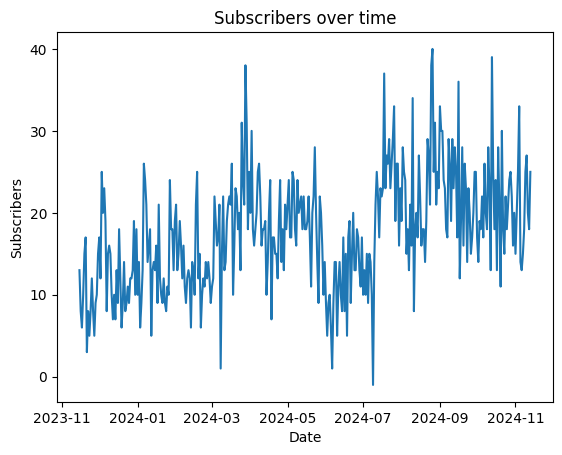

In [142]:
plot_data(clean_df["Subscribers"], title="Subscribers over time", x_label="Date", y_label="Subscribers")

In [143]:
def prepare_train_test_data(data, time_step_in, time_step_out, test_size=0.2):
    X, Y = create_dataset(data, time_step_in, time_step_out)
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size)

    # Separate scalers for X and Y
    scaler_X = MinMaxScaler(feature_range=(0,1))
    scaler_Y = MinMaxScaler(feature_range=(0,1))
    x_train = scaler_X.fit_transform(X_train)
    y_train = scaler_Y.fit_transform(Y_train)
    x_test = scaler_X.transform(X_test)
    y_test = scaler_Y.transform(Y_test)

    print(f'x_train shape: {x_train.shape}, y_train shape: {y_train.shape}, x_test shape: {x_test.shape}, y_test shape: {y_test.shape}')
    
    return x_train, x_test, y_train, y_test, scaler_X, scaler_Y
x_train, x_test, y_train, y_test, scaler_X, scaler_Y = prepare_train_test_data(data, time_step_in=30, time_step_out=7, test_size=0.2)

x_train shape: (262, 30), y_train shape: (262, 7), x_test shape: (66, 30), y_test shape: (66, 7)


In [144]:
x_train=x_train.reshape(x_train.shape[0],x_train.shape[1],1)
x_test=x_test.reshape(x_test.shape[0],x_test.shape[1],1)
print(f"X_test shape => {x_test.shape}\nX_train shape => {x_train.shape}")

X_test shape => (66, 30, 1)
X_train shape => (262, 30, 1)


## model definition

In [145]:
lstm_model=Sequential()
lstm_model.add(LSTM(50,return_sequences=True,input_shape=(30,1)))
lstm_model.add(LSTM(50,return_sequences=True))
lstm_model.add(LSTM(50))
lstm_model.add(Dense(7))
lstm_model.compile(loss='mean_absolute_error', optimizer=Adam(learning_rate=0.03), metrics=['mean_absolute_error'])
lstm_model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_15 (LSTM)                  │ (None, 30, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_16 (LSTM)                  │ (None, 30, 50)         │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_17 (LSTM)                  │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 7)              │           357 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 51,157 (199.83 KB)

 Trainable params: 51,157 (199.83 KB)

 Non-trainable params: 0 (0.00 B)

In [146]:
history=lstm_model.fit(
    x_train,y_train,
    epochs=100,
    validation_data=(x_test,y_test),
    verbose=1,
)

Epoch 1/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 93ms/step - loss: 0.4937 - mean_absolute_error: 0.4937 - val_loss: 0.2181 - val_mean_absolute_error: 0.2181
Epoch 2/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.1828 - mean_absolute_error: 0.1828 - val_loss: 0.1464 - val_mean_absolute_error: 0.1464
Epoch 3/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.1404 - mean_absolute_error: 0.1404 - val_loss: 0.1422 - val_mean_absolute_error: 0.1422
Epoch 4/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.1374 - mean_absolute_error: 0.1374 - val_loss: 0.1417 - val_mean_absolute_error: 0.1417
Epoch 5/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.1365 - mean_absolute_error: 0.1365 - val_loss: 0.1414 - val_mean_absolute_error: 0.1414
Epoch 6/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.1361 - mean_absolute_error: 0.1361 - val_loss: 0.1396 - val_mean_absolute_error: 0.1396
Epoch 7/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.1355 - mean_absolute_error: 0.1355 - val_loss: 0.140

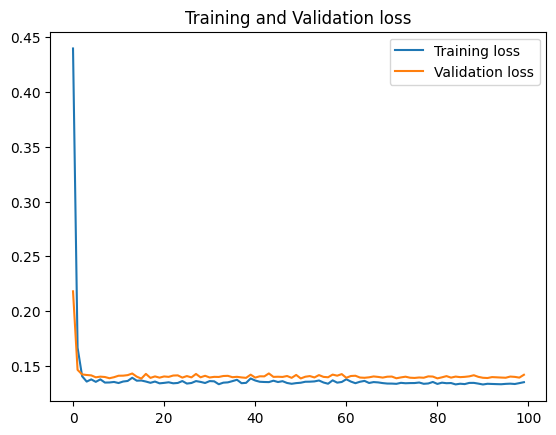

In [147]:
history_plot(history)

In [148]:
train_predicted=lstm_model.predict(x_train)
test_predicted=lstm_model.predict(x_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 70ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


In [149]:
mae_error_train= mae(y_train,train_predicted)
mae_error_test= mae(y_test,test_predicted)
print(f"MAE Train data  : {mae_error_train} ")
print(f"MAE  Test data : {mae_error_test} ")

MAE Train data  : 0.13400928484108363 
MAE  Test data : 0.14191014070237368 


In [ ]:
all_predictions = []
input_window = x_test[-1]  

for i in range(1, 6): 
    print(f'Step {i} ==> Input Window: {input_window}')
    
    if len(input_window.shape) == 1:
        input_window = input_window.reshape(-1, 1)
    
    # Reshape input window to 3D for LSTM (1 sample, time_steps, features)
    y_temp = lstm_model.predict(input_window.reshape(1, input_window.shape[0], input_window.shape[1]))
    print(f"Prediction Output (y_temp): {y_temp}")
    all_predictions.extend(y_temp[0]) 
    input_window = np.roll(input_window, -1, axis=0)
    input_window[-1] = y_temp[0][0]  

Step 1 ==> Input Window: [[0.04878049]
 [0.3902439 ]
 [0.53846154]
 [0.34146341]
 [0.36585366]
 [0.48780488]
 [0.53658537]
 [0.56097561]
 [0.55      ]
 [0.65853659]
 [0.26829268]
 [0.38461538]
 [0.58536585]
 [0.56097561]
 [0.45945946]
 [0.51219512]
 [0.35      ]
 [0.76923077]
 [0.6097561 ]
 [0.53658537]
 [0.94871795]
 [0.8       ]
 [0.43589744]
 [0.63157895]
 [0.525     ]
 [0.75609756]
 [0.43589744]
 [0.41463415]
 [0.46341463]
 [0.51219512]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Prediction Output (y_temp): [[0.4773152  0.456248   0.43369424 0.45238283 0.4877832  0.47695822
  0.47236055]]
Step 2 ==> Input Window: [[0.3902439 ]
 [0.53846154]
 [0.34146341]
 [0.36585366]
 [0.48780488]
 [0.53658537]
 [0.56097561]
 [0.55      ]
 [0.65853659]
 [0.26829268]
 [0.38461538]
 [0.58536585]
 [0.56097561]
 [0.45945946]
 [0.51219512]
 [0.35      ]
 [0.76923077]
 [0.6097561 ]
 [0.53658537]
 [0.94871795]
 [0.8       ]
 [0.43589744]
 [0.63157895]
 [0.525     ]
 [0.75609756]
 [0.43589744]
 [0.41463415]
 [

In [159]:
all_predictions=np.array(all_predictions)
all_predictions

array([0.4773152 , 0.456248  , 0.43369424, 0.45238283, 0.4877832 ,
       0.47695822, 0.47236055, 0.47731414, 0.45624664, 0.43369305,
       0.4523812 , 0.48778206, 0.4769569 , 0.4723598 , 0.47731417,
       0.45624676, 0.43369317, 0.45238128, 0.48778218, 0.4769569 ,
       0.4723599 , 0.47731414, 0.45624673, 0.43369317, 0.45238125,
       0.48778215, 0.4769569 , 0.4723599 , 0.47731414, 0.45624673,
       0.43369314, 0.45238125, 0.48778215, 0.47695687, 0.4723599 ],
      dtype=float32)

In [153]:
num_samples = len(all_predictions) // 7
all_predictions_reshaped = all_predictions.reshape(num_samples, 7)
y_next_30 = scaler_Y.inverse_transform(all_predictions_reshaped)
y_next_30=np.round(y_next_30)
print(y_next_30)

[[19. 18. 17. 18. 20. 19. 18.]
 [19. 18. 17. 18. 20. 19. 18.]
 [19. 18. 17. 18. 20. 19. 18.]
 [19. 18. 17. 18. 20. 19. 18.]
 [19. 18. 17. 18. 20. 19. 18.]]


In [154]:
x_train= x_train.reshape(x_train.shape[0], -1)
x_test= x_test.reshape(x_test.shape[0], -1)

print(f"X_test shape => {x_test.shape}\nX_train shape => {x_train.shape}")

X_test shape => (66, 30)
X_train shape => (262, 30)


In [155]:
x_test=scaler_X.inverse_transform(x_test)
x_train=scaler_X.inverse_transform(x_train)

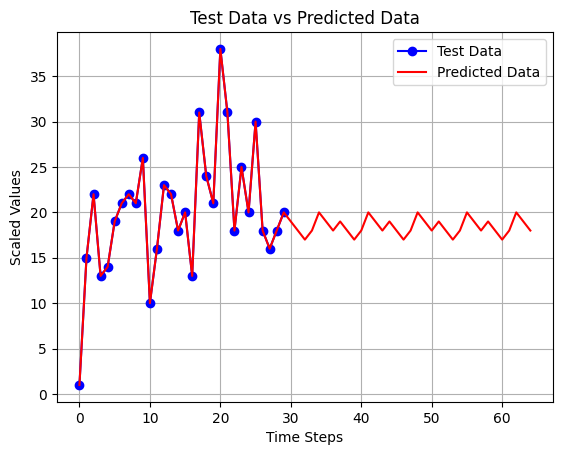

In [157]:
plt.plot(x_test[-1], label='Test Data', color='blue', marker='o')
plt.plot(np.hstack([x_test[-1], y_next_30.reshape(-1)]), label='Predicted Data', color='red')
plt.title('Test Data vs Predicted Data')
plt.xlabel('Time Steps')
plt.ylabel('Scaled Values')
plt.legend()
plt.grid(True)
plt.show()

In [158]:
last_date = clean_df.index[-1]
total_sub = np.sum(np.array(clean_df['Subscribers']))
total_next_30 = np.sum(y_next_30)
print(f"Total subscribers till {last_date}: {total_sub}, next_30_days: {np.round(total_next_30)} => final after 30 days: {total_sub + round(total_next_30)}")

Total subscribers till 2024-11-13 00:00:00: 6383, next_30_days: 645.0 => final after 30 days: 7028
